In [4]:
import pandas as pd
from sklearn import datasets
import numpy as np
from src.data.SampleTransformer import SampleTransformer
from src.model.SampleModel import SampleModel
# I want to illustrate the use of pipeline
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

/Users/eyang/miniconda3/envs/samplestructure/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

array([[1.        , 0.86060599],
       [0.86060599, 1.        ]])

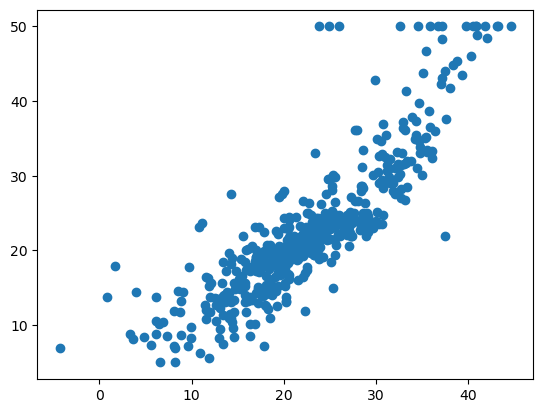

In [5]:
data = datasets.load_boston()
X = pd.DataFrame(data['data'])
X.columns = data['feature_names']
y = pd.DataFrame(data['target'])

# ML Data wrangling and predict should be 
# done via a pipeline because then it's clear in one place
# what the actual steps are
# this also makes it a bit easier to refactor the code
# going forward

# Normally commandline arguments are to train a model, pickle
# and upload to whatever model store 
pipe = Pipeline(steps=[
    ('scale', SampleTransformer()),
    ('predict', SampleModel())])
y_hat = pipe.fit_transform(X, y)
display(np.corrcoef(y_hat, y[0]))

plt.scatter(y_hat, y[0])
